In [73]:
from __future__ import division
import math
import time
import scipy.special
import scipy.optimize
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import pprint,pickle
import multiprocessing as mp
from functools import partial
np.random.seed(0)

# sigmaset = np.linspace(0,44,num=441)
# results = pickle.load(open('results_muz10_sigmaz1_cost0_psetres200_sigmasetres441_ncurves2.pkl','rb'))
#sigmaset=np.linspace(3,69,num=23) ####this used for not removing the tail for 2stage
#sigmaset=np.linspace(3,45,num=15) ####this used for removing the tail for 2stage
#sigmaset=np.append(1.5, sigmaset)
#sigmaset2 = np.linspace(0,44,num=441)##High res
results = pickle.load(open('results_muz10_sigmaz4_cost3_psetres200_sigmasetres24_ncurves3.pkl','rb'))
#resultsapp= pickle.load(open('netecon_results_muz10_sigmaz1_cost3_psetres200_sigmasetres15_ncurves3.pkl','rb'))
#results2 = pickle.load(open('results_muz10_sigmaz4_cost3_psetres200_sigmasetres441_ncurves2.pkl','rb'))##High res

In [74]:
#results = resultsapp + results
sigmaset=array([x['sigma'] for x  in results])
#sigmaset=sigmaset[sigmaset<46]

In [75]:
#sigmaset[0] = 1.0/len(sigmaset)
results_temp = {x['sigma']:x for x in results}
revx_vs_sigma = np.zeros((3,len(sigmaset)))
for idxi,sigtemp in enumerate(sigmaset):
    revx_vs_sigma[2,idxi] = results_temp[sigtemp]['2stg']
    revx_vs_sigma[0,idxi] = results_temp[sigtemp]['no']
    revx_vs_sigma[1,idxi] = results_temp[sigtemp]['full']


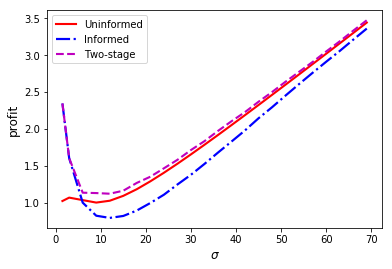

In [78]:
fig, ax = plt.subplots(1, 1)
names = {0: 'Uninformed', 1:'Informed'}
ax.plot(sigmaset,revx_vs_sigma[0],color= 'red',lw=2.1,label=names[0])
ax.plot(sigmaset,revx_vs_sigma[1],'-.', color= 'b',lw=2.2,label=names[1])
ax.plot(sigmaset,revx_vs_sigma[2],'--',color= 'm',lw=2.1,label='Two-stage')
ax.set_xlabel('$\sigma$', fontsize = 12)
ax.set_ylabel('profit', fontsize = 12)
plt.legend(loc='best')
plt.show()

In [47]:
sigmaset2[0] = 1.0/len(sigmaset2)
results_temp2 = {x['sigma']:x for x in results2}
revx_vs_sigma2 = np.zeros((2,len(sigmaset2)))
for idxi,sigtemp in enumerate(sigmaset2):
    revx_vs_sigma2[0,idxi] = results_temp2[sigtemp]['no']
    revx_vs_sigma2[1,idxi] = results_temp2[sigtemp]['full']

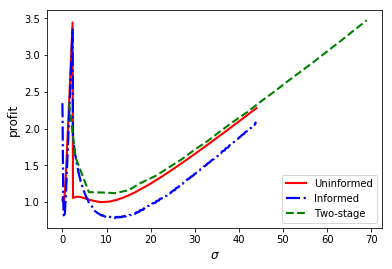

In [52]:
fig, ax = plt.subplots(1, 1)
names = {0: 'Uninformed', 1:'Informed'}
ax.plot(sigmaset2,revx_vs_sigma2[0],color= 'red',lw=2.1,label=names[0])
ax.plot(sigmaset2,revx_vs_sigma2[1],'-.', color= 'b',lw=2.2,label=names[1])
ax.plot(sigmaset,revx_vs_sigma[0],'--',color= 'green',lw=2.1,label='Two-stage')
ax.set_xlabel('$\sigma$', fontsize = 12)
ax.set_ylabel('profit', fontsize = 12)
plt.legend(loc='best')
plt.show()

In [55]:
sigmaset[0] = 1.0/len(sigmaset)
results_temp = {x['sigma']:x for x in results}
revx_vs_sigma = np.zeros((3,len(sigmaset)))
for idxi,sigtemp in enumerate(sigmaset):
    revx_vs_sigma[0,idxi] = results_temp[sigtemp]['no']
    revx_vs_sigma[1,idxi] = results_temp[sigtemp]['full']
    revx_vs_sigma[2,idxi] = results_temp[sigtemp]['2stg']
fig, ax = plt.subplots(1, 1)
names = {0: 'Uninformed', 1:'Informed',2:'Two-stage'}
for g in range(3):
   ax.plot(sigmaset,revx_vs_sigma[g],label=names[g])
plt.legend(loc='best')
plt.show()

KeyError: 0.041666666666666664

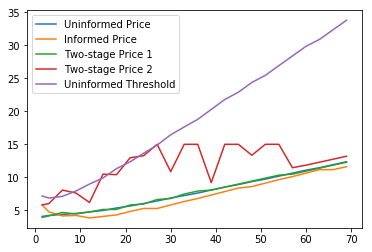

In [26]:
px_vs_sigma = np.zeros((5,len(sigmaset)))
for idxi,sigtemp in enumerate(sigmaset):
    px_vs_sigma[0,idxi] = results_temp[sigtemp]['prn']
    px_vs_sigma[1,idxi] = results_temp[sigtemp]['prf']
    px_vs_sigma[2,idxi] = results_temp[sigtemp]['pr2'][0]
    px_vs_sigma[3,idxi] = results_temp[sigtemp]['pr2'][1]
    px_vs_sigma[4,idxi] = results_temp[sigtemp]['th_no']
    
fig, ax = plt.subplots(1, 1)
names = {0: 'Uninformed Price', 1:'Informed Price',2:'Two-stage Price 1',3:'Two-stage Price 2', 4: 'Uninformed Threshold'}
for g in range(5):
    ax.plot(sigmaset,px_vs_sigma[g],label=names[g])
    #px_vs_sigma[3,idxi] = results_temp[sigtemp]['pr2']ax.plot(sigmaset,px_vs_sigma[g],label=names[g])
plt.legend(loc='best')
plt.show()

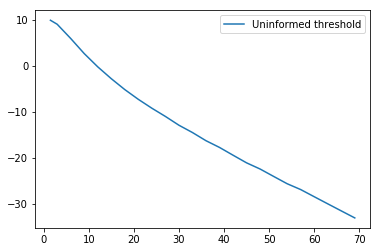

In [17]:
px_vs_sigma = np.zeros((4,len(sigmaset)))
for idxi,sigtemp in enumerate(sigmaset):
    px_vs_sigma[0,idxi] = muz+(math.sqrt(sigtemp**2+sigmaz**2))*math.sqrt(2)*scipy.special.erfinv(1-2*(1-(results_temp[sigtemp]['no']/results_temp[sigtemp]['prn'])))
    #px_vs_sigma[1,idxi] = 1-(results_temp[sigtemp]['full']/results_temp[sigtemp]['prf'])
    #px_vs_sigma[2,idxi] = results_temp[sigtemp]['2stg']/results_temp[sigtemp]['pr2'][0]
    #px_vs_sigma[3,idxi] = results_temp[sigtemp]['2stg']/results_temp[sigtemp]['pr2'][1]
fig, ax = plt.subplots(1, 1)
#names = {0: 'Uninformed threshold', 1:'Informed threshold',2:'Two-stage threshold 1',3:'Two-stage threshold 2'}
#for g in range(4):
   #ax.plot(sigmaset,px_vs_sigma[g],label=names[g])
ax.plot(sigmaset,px_vs_sigma[0],label="Uninformed threshold")    
plt.legend(loc='best')
plt.show()

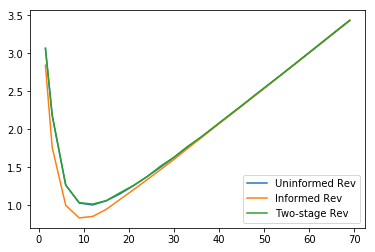

In [96]:
px_vs_sigma = np.zeros((4,len(sigmaset)))
for idxi,sigtemp in enumerate(sigmaset):
    px_vs_sigma[0,idxi] = results_temp[sigtemp]['no']
    px_vs_sigma[1,idxi] = results_temp[sigtemp]['full']
    px_vs_sigma[2,idxi] = results_temp[sigtemp]['2stg']
    px_vs_sigma[3,idxi] = results_temp[sigtemp]['2stg']
fig, ax = plt.subplots(1, 1)
names = {0: 'Uninformed Rev', 1:'Informed Rev',2:'Two-stage Rev'}
for g in range(3):
   ax.plot(sigmaset,px_vs_sigma[g],label=names[g])
plt.legend(loc='best')
plt.show()

In [11]:
px_vs_sigma[2,:]

array([  8.42713568,   6.3919598 ,   5.98492462,   6.12060302,
         6.66331658,   7.20603015,   7.74874372,   8.42713568,
         8.96984925,   9.64824121,  10.19095477,  10.73366834])

In [12]:
px_vs_sigma[3,:]

array([  8.56281407,   6.52763819,   6.12060302,  22.26633166,
        22.67336683,   9.37688442,  16.5678392 ,   9.7839196 ,
         9.10552764,   9.7839196 ,  10.32663317,  10.86934673])

In [13]:
sigmaset

array([  0.08333333,   4.        ,   8.        ,  12.        ,
        16.        ,  20.        ,  24.        ,  28.        ,
        32.        ,  36.        ,  40.        ,  44.        ])

In [2]:
import numpy as np

In [10]:
a=np.linspace(0,.25,num=5)
b =np.linspace(.25,5,num=5)
c = np.linspace(5,30,num=6)

In [17]:
np.hstack((np.hstack((a,b)),c))

array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.25  ,  1.4375,
        2.625 ,  3.8125,  5.    ,  5.    , 10.    , 15.    , 20.    ,
       25.    , 30.    ])

In [16]:
np.hstack((a,b))

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.25  , 1.4375, 2.625 ,
       3.8125, 5.    ])